In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:

# importing libraries for KNN

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate



In [3]:
df = pd.read_csv("train.csv")

In [4]:
#Handling Embarked feature by replace the missing values with the most common value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [5]:
#Handling Cabin feature by making a new featur "Deck" taking the fist letter and replace the missing values with 'N'

df['Deck']=df["Cabin"]
df['Deck']=df["Deck"].str.slice(0,1)
df['Deck']=df["Deck"].fillna("N")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [6]:
#change the 'sex' , 'Embarked' , 'Deck' to numbers
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

df.Deck.replace(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [1, 2, 3,4,5,6,7,8,9], inplace=True)



In [7]:
##not for this session
#Second method of age
#use sklearn to applay the KNNImputer to predict the missing values of the age
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df_filled=pd.DataFrame(imputer.fit_transform(df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]),)
df['KNN_pridect_Age']=df_filled[7].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,KNN_pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1,1,33
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26


In [14]:
df.drop(['Name','Ticket','Cabin','Age'] ,axis=1 , inplace=True)

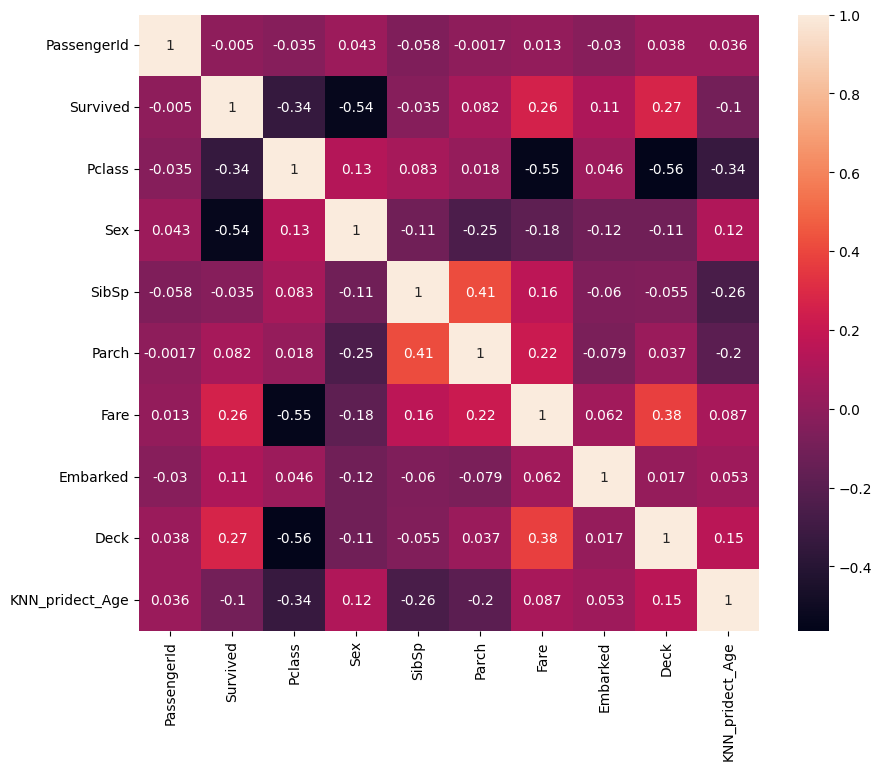

In [15]:
#session start
#Finding correlations to determine the necessary features by heatmap
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


#  Workhsop 3

In [9]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
x1= df[['Pclass', 'Sex', 'KNN_pridect_Age']]
x2 = df[['SibSp', 'Parch','Fare']]
x3 =df[[ 'Sex', 'Embarked' ,'Deck']]

y=df['Survived']

In [10]:
#Split

In [11]:
accuracy_dict={}
for i in np.arange(0.2,0.5,0.05):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)      
    LR=LogisticRegression().fit(X_train,y_train)
    y_predict=LR.predict(X_test)
    s=accuracy_score(y_predict,y_test)
    accuracy_dict[round(i,2)]=round(s,2)
     
    
print("Accuracy dict: ", accuracy_dict)

Accuracy dict:  {0.2: 0.79, 0.25: 0.82, 0.3: 0.79, 0.35: 0.79, 0.4: 0.78, 0.45: 0.8}


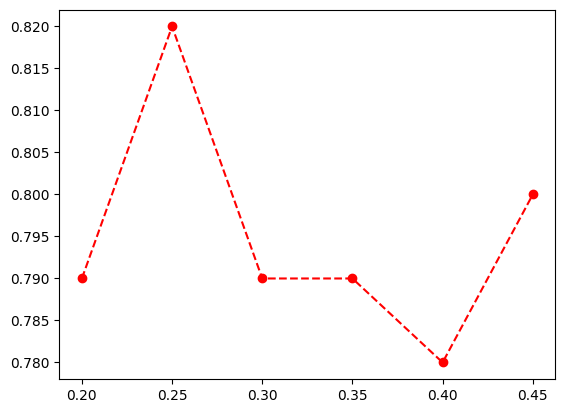

In [18]:
keys = accuracy_dict.keys()
values = accuracy_dict.values()

plt.plot(keys, values, linestyle='--', marker='o', color='r', label='line with marker')

In [19]:
hritikas_dictionary = {}
for i in np.arange(0.2,0.31,0.05):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)
    print(i)
    #print("Test sample size: ", i)
    #print("\n")
    final_scores = []
    for j in range(1,20,1):
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        acc = accuracy_score(y_test, pred, normalize=True) * float(100)
        final_scores.append(acc)
        print('\n CV accuracy for k=%d is %d'%(j,acc))
    optimal_k = final_scores.index(max(final_scores))
    max_scores = max(final_scores)
    print(optimal_k+1,max(final_scores), "\n") 
    hritikas_dictionary[i] = max(final_scores)
       
hritikas_dictionary
#The best result is test sample =0.2
#k=15

0.2

 CV accuracy for k=1 is 69

 CV accuracy for k=2 is 68

 CV accuracy for k=3 is 73

 CV accuracy for k=4 is 69

 CV accuracy for k=5 is 72

 CV accuracy for k=6 is 68

 CV accuracy for k=7 is 70

 CV accuracy for k=8 is 70

 CV accuracy for k=9 is 71

 CV accuracy for k=10 is 69

 CV accuracy for k=11 is 70

 CV accuracy for k=12 is 72

 CV accuracy for k=13 is 72

 CV accuracy for k=14 is 70

 CV accuracy for k=15 is 69

 CV accuracy for k=16 is 70

 CV accuracy for k=17 is 69

 CV accuracy for k=18 is 70

 CV accuracy for k=19 is 68
3 73.18435754189943 

0.25

 CV accuracy for k=1 is 73

 CV accuracy for k=2 is 69

 CV accuracy for k=3 is 72

 CV accuracy for k=4 is 72

 CV accuracy for k=5 is 69

 CV accuracy for k=6 is 70

 CV accuracy for k=7 is 71

 CV accuracy for k=8 is 71

 CV accuracy for k=9 is 72

 CV accuracy for k=10 is 71

 CV accuracy for k=11 is 71

 CV accuracy for k=12 is 73

 CV accuracy for k=13 is 73

 CV accuracy for k=14 is 74

 CV accuracy for k=15 is 72



{0.2: 73.18435754189943, 0.25: 74.43946188340807, 0.3: 75.74626865671642}

[[110  28]
 [ 31  54]]
Accuracy score:  73.54260089686099


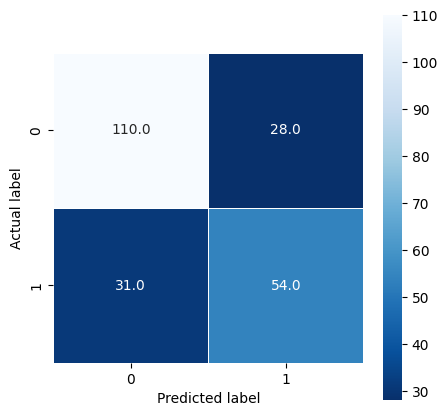

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
con_mat=confusion_matrix(y_test,pred)
print(con_mat)
print("Accuracy score: ", acc)
plt.figure(figsize=(5,5))
sns.heatmap(con_mat, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Accuracy score: 0.8324022346368715 

Accuracy score: 0.8251121076233184 

Accuracy score: 0.8022388059701493 

Accuracy score: 0.7756410256410257 

Accuracy score: 0.834733893557423 

Accuracy score: 0.800498753117207 

Confusion matrix:  [[110  28]
 [ 31  54]]
{0.2: 0.832, 0.25: 0.825, 0.3: 0.802, 0.35: 0.776, 0.4: 0.835, 0.45: 0.8}


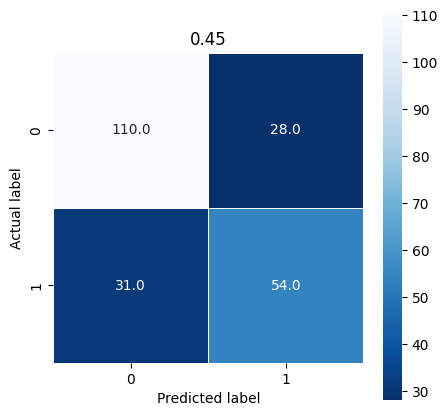

In [25]:

from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
accuracy_dict1={}
for i in np.arange(0.2, 0.5, 0.05):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)
    model = LinearDiscriminantAnalysis()
    res = model.fit(X_train, y_train).transform(X_train)
    y_pred= model.predict(X_test)
    model.decision_function(X_test)
    score=accuracy_score(y_pred,y_test)
    accuracy_dict1[round(i,2)]=round(score,3)
    print("Accuracy score:", score, "\n")

#Confusion matrix
print("Confusion matrix: ",  con_mat)
plt.figure(figsize=(5,5))
sns.heatmap(con_mat, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(round(i,2))
    
print(accuracy_dict1)

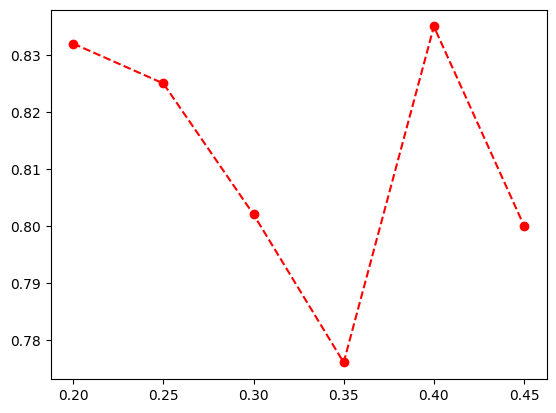

In [26]:
keys = accuracy_dict1.keys()
values = accuracy_dict1.values()

plt.plot(keys, values, linestyle='--', marker='o', color='r', label='line with marker')

In [ ]:
#Cross Validation

In [29]:
#Logistic Regression

LR=LogisticRegression()
score5=cross_val_score(LR,X,y,cv=5)
score10=cross_val_score(LR,X,y,cv=10)

print('Score mean5:' ,score5.mean())
print('Score mean10:' ,score10.mean())


Score mean5: 0.7968426338585148
Score mean10: 0.802434456928839


In [30]:
# KNN


final_scores5 = []
final_scores10 = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)  
   
    score5=cross_val_score(knn,X,y,cv=5)    
    final_scores5.append(score5.mean())
    
    score10=cross_val_score(knn,X,y,cv=10)    
    final_scores10.append(score10.mean())

optimal_k5 = final_scores5.index(max(final_scores5))
print('best k=',optimal_k5 +1, 'score:',max(final_scores5))
optimal_k10=final_scores10.index(max(final_scores10))
print('best k=',optimal_k10+1,'score:',max(final_scores10))

best k= 15 score: 0.7105140920218441
best k= 9 score: 0.7116229712858926


In [31]:
#Discriminant Analysis

model = LinearDiscriminantAnalysis()
score5=cross_val_score(model,X,y,cv=5)
score10=cross_val_score(model,X,y,cv=10)

print('Score mean5:' ,score5.mean())
print('Score mean10:' ,score10.mean())


Score mean5: 0.7957190383528969
Score mean10: 0.799063670411985


0.7835820895522388
Confusion_matrix for x1: [[110  28]
 [ 31  54]]
0.6865671641791045
Confusion_matrix for x2: [[110  28]
 [ 31  54]]
0.7910447761194029
Confusion_matrix for x3: [[110  28]
 [ 31  54]]
{'x1': 0.7835820895522388, 'x2': 0.6865671641791045, 'x3': 0.7910447761194029}


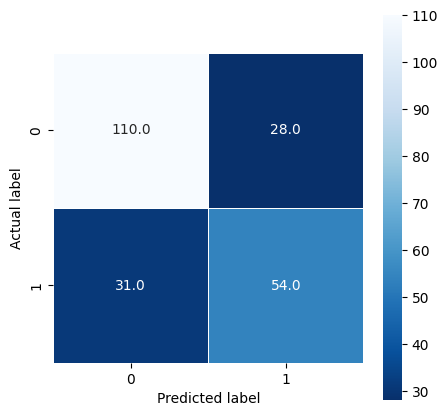

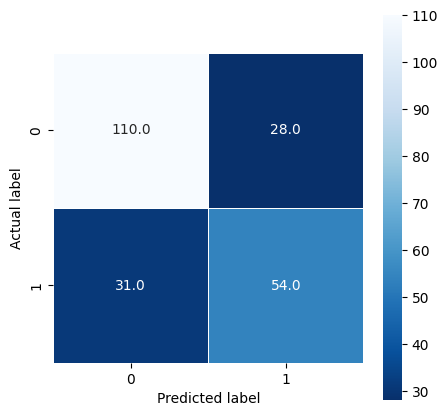

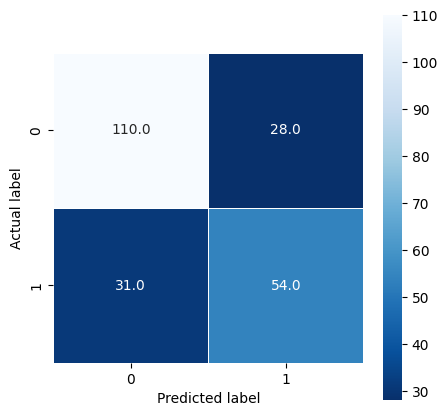

In [32]:
fList=[x1,x2,x3]
ls = ['x1','x2','x3']
count = 0
acc_dict={}
for i in fList:
    X_train,X_test,y_train,y_test=train_test_split(i,y,test_size=0.3)
    #Logistic Regression
   
    LR=LogisticRegression().fit(X_train,y_train)
    y_predict=LR.predict(X_test)
    s=accuracy_score(y_predict,y_test)
    acc_dict[ls[count]]=s
    print(s)
    print("Confusion_matrix for {}:".format(ls[count]), con_mat)
    count+=1
    plt.figure(figsize=(5,5))
    sns.heatmap(con_mat, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    
print(acc_dict)

In [33]:
fList=[x1,x2,x3]
ls = ['x1','x2','x3']
count = 0
acc_dict={}
for i in fList:
    X_train,X_test,y_train,y_test=train_test_split(i,y,test_size=0.3)
    final_scores = []
    for i in range(1,20,1):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        score=cross_val_score(knn,X_train,y_train,cv=5)
        print("Score:",score)
        acc = accuracy_score(y_test, pred, normalize=True) * float(100)
        final_scores.append(acc)
        print('\n CV accuracy for k=%d is %d'%(i,acc))
    optimal_k = final_scores.index(max(final_scores))
    print(optimal_k+1)   

    
print(acc_dict)

Score: [0.808      0.808      0.808      0.70967742 0.75      ]

 CV accuracy for k=1 is 78
Score: [0.776      0.792      0.776      0.78225806 0.76612903]

 CV accuracy for k=2 is 72
Score: [0.784      0.768      0.768      0.69354839 0.71774194]

 CV accuracy for k=3 is 74
Score: [0.8        0.768      0.824      0.74193548 0.73387097]

 CV accuracy for k=4 is 75
Score: [0.776      0.76       0.768      0.73387097 0.75806452]

 CV accuracy for k=5 is 76
Score: [0.736      0.76       0.768      0.74193548 0.7016129 ]

 CV accuracy for k=6 is 75
Score: [0.752      0.736      0.752      0.75806452 0.74193548]

 CV accuracy for k=7 is 75
Score: [0.696      0.736      0.76       0.76612903 0.71774194]

 CV accuracy for k=8 is 75
Score: [0.688      0.728      0.768      0.76612903 0.72580645]

 CV accuracy for k=9 is 75
Score: [0.696      0.72       0.728      0.75806452 0.72580645]

 CV accuracy for k=10 is 74
Score: [0.728      0.744      0.744      0.77419355 0.75      ]

 CV accuracy f

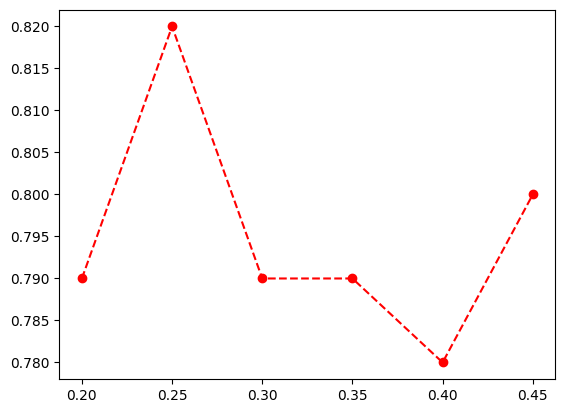

In [36]:
keys = accuracy_dict.keys()
values = accuracy_dict.values()

plt.plot(keys, values, linestyle='--', marker='o', color='r', label='line with marker')

In [37]:
hritikas_dictionary = {}
for i in np.arange(0.2,0.31,0.05):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)
    print(i)
    #print("Test sample size: ", i)
    #print("\n")
    final_scores = []
    for j in range(1,20,1):
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        acc = accuracy_score(y_test, pred, normalize=True) * float(100)
        final_scores.append(acc)
        print('\n CV accuracy for k=%d is %d'%(j,acc))
    optimal_k = final_scores.index(max(final_scores))
    print(optimal_k+1,max(final_scores), "\n") 
    hritikas_dictionary[i] = final_scores
    
hritikas_dictionary
    

0.2

 CV accuracy for k=1 is 77

 CV accuracy for k=2 is 74

 CV accuracy for k=3 is 80

 CV accuracy for k=4 is 73

 CV accuracy for k=5 is 76

 CV accuracy for k=6 is 72

 CV accuracy for k=7 is 74

 CV accuracy for k=8 is 71

 CV accuracy for k=9 is 73

 CV accuracy for k=10 is 73

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 74

 CV accuracy for k=13 is 71

 CV accuracy for k=14 is 71

 CV accuracy for k=15 is 72

 CV accuracy for k=16 is 74

 CV accuracy for k=17 is 73

 CV accuracy for k=18 is 72

 CV accuracy for k=19 is 74
3 80.44692737430168 

0.25

 CV accuracy for k=1 is 62

 CV accuracy for k=2 is 66

 CV accuracy for k=3 is 67

 CV accuracy for k=4 is 68

 CV accuracy for k=5 is 69

 CV accuracy for k=6 is 65

 CV accuracy for k=7 is 69

 CV accuracy for k=8 is 68

 CV accuracy for k=9 is 67

 CV accuracy for k=10 is 68

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 66

 CV accuracy for k=13 is 69

 CV accuracy for k=14 is 69

 CV accuracy for k=15 is 69



{0.2: [77.6536312849162,
  74.30167597765363,
  80.44692737430168,
  73.74301675977654,
  76.53631284916202,
  72.62569832402235,
  74.30167597765363,
  71.50837988826815,
  73.18435754189943,
  73.18435754189943,
  69.83240223463687,
  74.30167597765363,
  71.50837988826815,
  71.50837988826815,
  72.62569832402235,
  74.86033519553072,
  73.74301675977654,
  72.06703910614524,
  74.30167597765363],
 0.25: [62.78026905829597,
  66.3677130044843,
  67.2645739910314,
  68.60986547085201,
  69.05829596412556,
  65.47085201793722,
  69.95515695067265,
  68.60986547085201,
  67.71300448430493,
  68.60986547085201,
  69.05829596412556,
  66.81614349775785,
  69.05829596412556,
  69.05829596412556,
  69.50672645739911,
  67.71300448430493,
  69.50672645739911,
  69.50672645739911,
  69.50672645739911],
 0.3: [67.91044776119402,
  71.26865671641791,
  72.01492537313433,
  71.64179104477611,
  70.52238805970148,
  74.6268656716418,
  70.1492537313433,
  72.76119402985076,
  71.26865671641791,


In [41]:
#Logistic Regression

LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
s=accuracy_score(y_predict,y_test)
score=cross_val_score(LR,X_train,y_train,cv=5)
con_mat=confusion_matrix(y_test,y_predict)

print('Score mean:' ,score.mean())
print("Accuracy score: ", s)
print("Score:",score)
print("Confusion_matrix:", con_mat)

Score mean: 0.8201290322580645
Accuracy score:  0.7686567164179104
Score: [0.816      0.84       0.864      0.77419355 0.80645161]
Confusion_matrix: [[149  30]
 [ 32  57]]


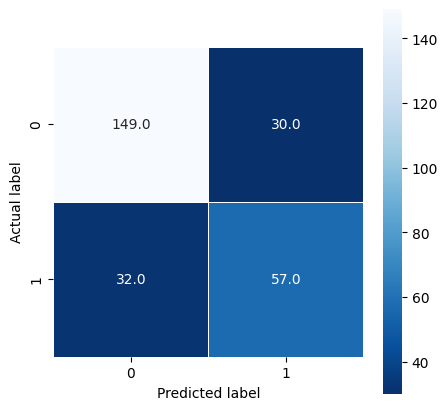

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(con_mat, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [43]:
# KNN

#KNN
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score=cross_val_score(knn,X_train,y_train,cv=5)
    print("Score:",score)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
optimal_k = final_scores.index(max(final_scores))
print(optimal_k+1)   

Score: [0.648      0.704      0.688      0.72580645 0.66129032]

 CV accuracy for k=1 is 67
Score: [0.664      0.712      0.664      0.72580645 0.68548387]

 CV accuracy for k=2 is 71
Score: [0.608      0.744      0.64       0.74193548 0.66935484]

 CV accuracy for k=3 is 72
Score: [0.624      0.728      0.632      0.75       0.69354839]

 CV accuracy for k=4 is 71
Score: [0.632      0.736      0.656      0.75806452 0.65322581]

 CV accuracy for k=5 is 70
Score: [0.616      0.744      0.664      0.75       0.65322581]

 CV accuracy for k=6 is 74
Score: [0.632      0.776      0.68       0.75806452 0.68548387]

 CV accuracy for k=7 is 70
Score: [0.624      0.76       0.624      0.71774194 0.68548387]

 CV accuracy for k=8 is 72
Score: [0.632      0.776      0.68       0.72580645 0.66935484]

 CV accuracy for k=9 is 71
Score: [0.64       0.752      0.648      0.72580645 0.68548387]

 CV accuracy for k=10 is 73
Score: [0.632      0.76       0.688      0.72580645 0.66935484]

 CV accuracy f

In [45]:
def model_score(key):
    print(key)


    x = df.iloc[:, 1:]
    if(len(key) > 0):
        x = x.drop(columns=[key])
        x = x.values
        
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


    # k-value
    error_rate=[]
    for i in range (1,31):
        clf=KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train,y_train.ravel())
        predict_i=clf.predict(x_test)
        error_rate.append(1 - accuracy_score(y_test, predict_i))
    k_value = error_rate.index(min(error_rate)) + 1


    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k_value)))



    dict = {}
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
        dict[name] = [cv_results.mean(), cv_results.std()]

    return dict

In [46]:
results = {}

In [47]:
for key in df.columns[2:]:
    results[key] = pd.DataFrame(model_score(key))

Pclass
Sex
SibSp
Parch
Fare
Embarked
Deck
KNN_pridect_Age


In [48]:
results

{'Pclass':     LR       LDA       KNN
 0  1.0  0.804219  0.736852
 1  0.0  0.015973  0.040236,
 'Sex':     LR       LDA       KNN
 0  1.0  0.723832  0.754426
 1  0.0  0.031487  0.013712,
 'SibSp':     LR       LDA       KNN
 0  1.0  0.807394  0.747961
 1  0.0  0.041514  0.048034,
 'Parch':     LR       LDA       KNN
 0  1.0  0.797755  0.717574
 1  0.0  0.017150  0.024162,
 'Fare':     LR       LDA       KNN
 0  1.0  0.797832  0.869923
 1  0.0  0.034103  0.021547,
 'Embarked':     LR       LDA       KNN
 0  1.0  0.797794  0.759187
 1  0.0  0.033664  0.043789,
 'Deck':     LR       LDA       KNN
 0  1.0  0.797781  0.722335
 1  0.0  0.018259  0.028689,
 'KNN_pridect_Age':     LR       LDA       KNN
 0  1.0  0.796181  0.890890
 1  0.0  0.026812  0.027507}

In [49]:
full_dataset_result = pd.DataFrame(model_score(''))
full_dataset_result

,LR,LDA,KNN
0,1.0,0.794568,0.743290
1,0.0,0.021039,0.032843


In [50]:
margins = {}

In [51]:
for key, res in results.items():
    tmp_dict = {}
    for model in res.columns:
        tmp_dict[model] = []
        tmp_dict[model].append(res[model][0] - full_dataset_result[model][0])
        tmp_dict[model].append(res[model][1] - full_dataset_result[model][1])

    margins[key] = pd.DataFrame(tmp_dict)

In [52]:
margins['SibSp']

,LR,LDA,KNN
0,0.0,0.012826,0.004671
1,0.0,0.020476,0.015192


In [53]:
margins

margins_means = {}

for key, res in margins.items():
    for col in res.columns:
        margins_means[col] = {}
        for key2, res2 in margins.items():
            margins_means[col][key2] = margins[key2][col][0]

In [54]:
for model, res in margins_means.items():
    minimum = min(res, key=res.get)
    print(model, ':',minimum, '(',res[minimum], ')')

LR : Pclass ( 0.0 )
LDA : Sex ( -0.07073548387096762 )
KNN : Parch ( -0.02571612903225795 )


In [55]:
margins['Pclass']

,LR,LDA,KNN
0,0.0,0.009652,-0.006439
1,0.0,-0.005065,0.007393


In [56]:
margins['Sex']

,LR,LDA,KNN
0,0.0,-0.070735,0.011135
1,0.0,0.010449,-0.019131


In [57]:
margins['Parch']

,LR,LDA,KNN
0,0.0,0.003187,-0.025716
1,0.0,-0.003888,-0.008681


NameError: name 'margins_df' is not defined

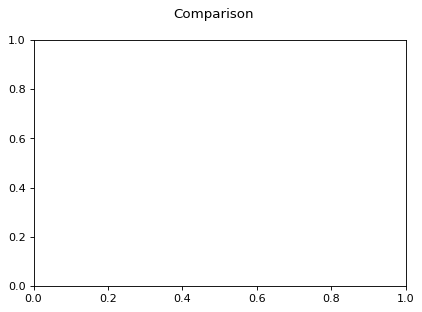

In [58]:
fig = plt.figure(figsize=(6, 4), dpi=80)
fig.suptitle('Comparison')
ax = fig.add_subplot(111)
plt.boxplot(margins_df)
ax.set_xticklabels(margins_df.columns)
plt.ylabel('Margins')
plt.show()

In [ ]:
results

In [ ]:
margins_means = {}


In [59]:

for key, res in margins.items():
    for col in res.columns:
        margins_means[col] = {}
        for key2, res2 in margins.items():
            margins_means[col][key2] = margins[key2][col][0]
            
            
for model, res in margins_means.items():
    minimum = min(res, key=res.get)
    print(model, ':',minimum, '(',res[minimum], ')')

LR : Pclass ( 0.0 )
LDA : Sex ( -0.07073548387096762 )
KNN : Parch ( -0.02571612903225795 )


In [60]:
margins_df = pd.DataFrame(margins_means)

In [61]:
margins_df.index

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'KNN_pridect_Age'],
      dtype='object')

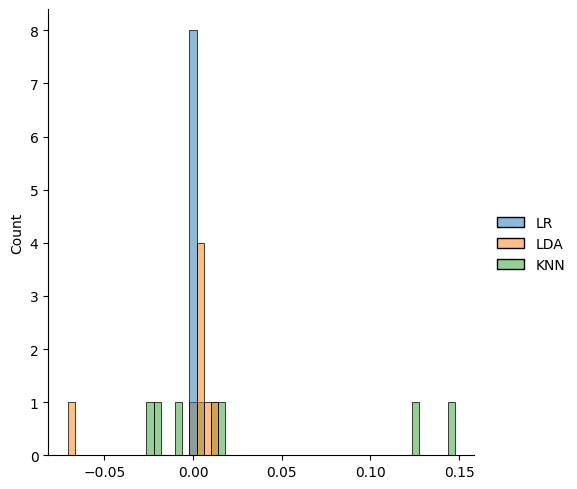

In [62]:
x = sns.displot(data = margins_df)
#Comparison of margins in accuracy

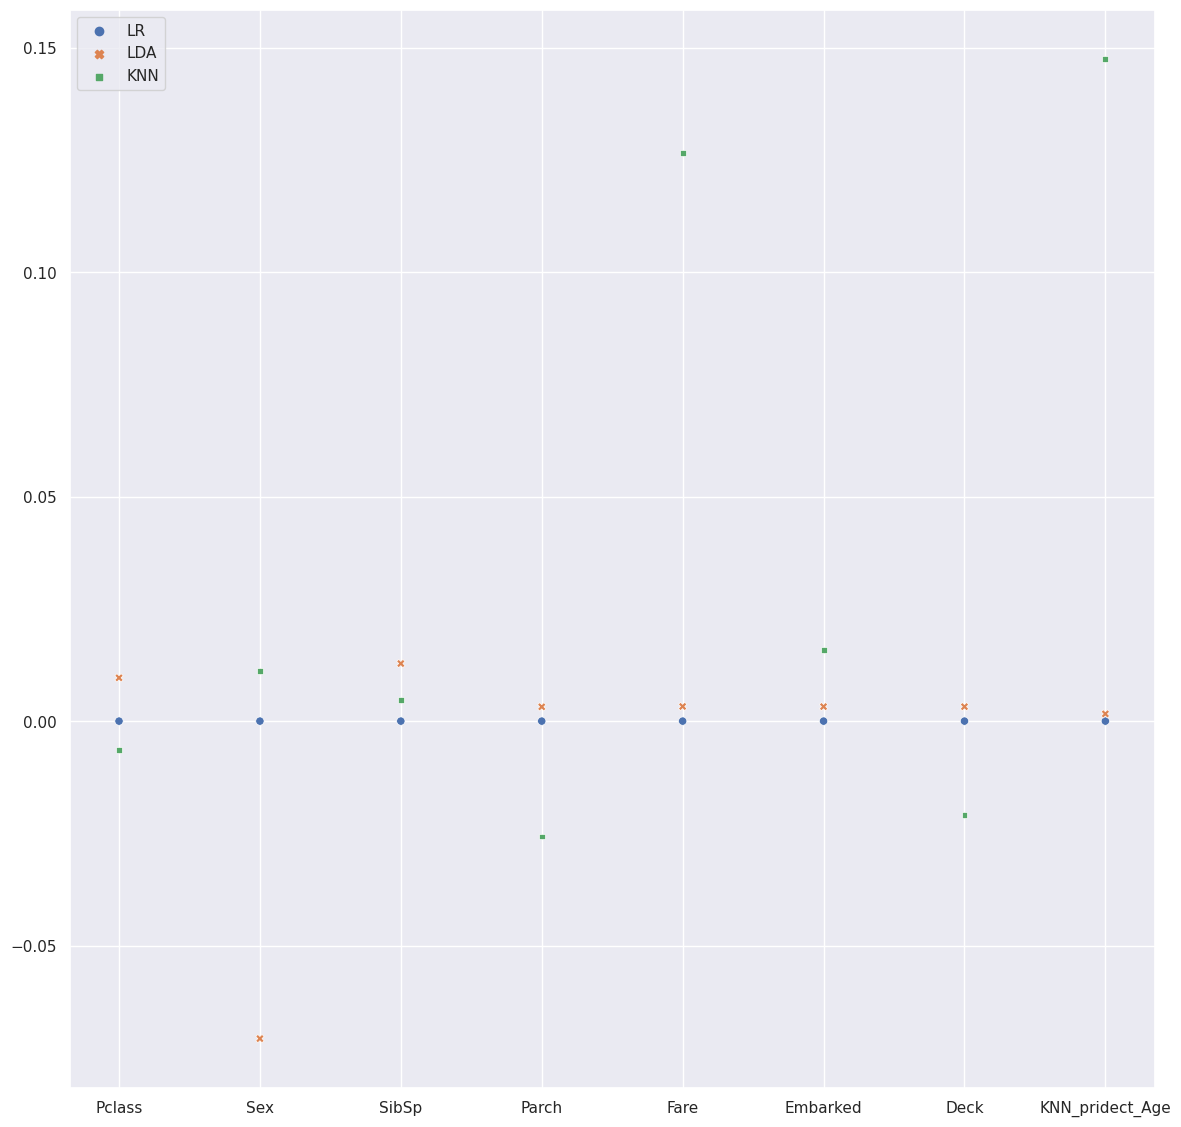

In [63]:
sns.set(rc = {'figure.figsize':(14,14)})
sns.scatterplot(data=margins_df)
plt.show()

<AxesSubplot: ylabel='KNN'>

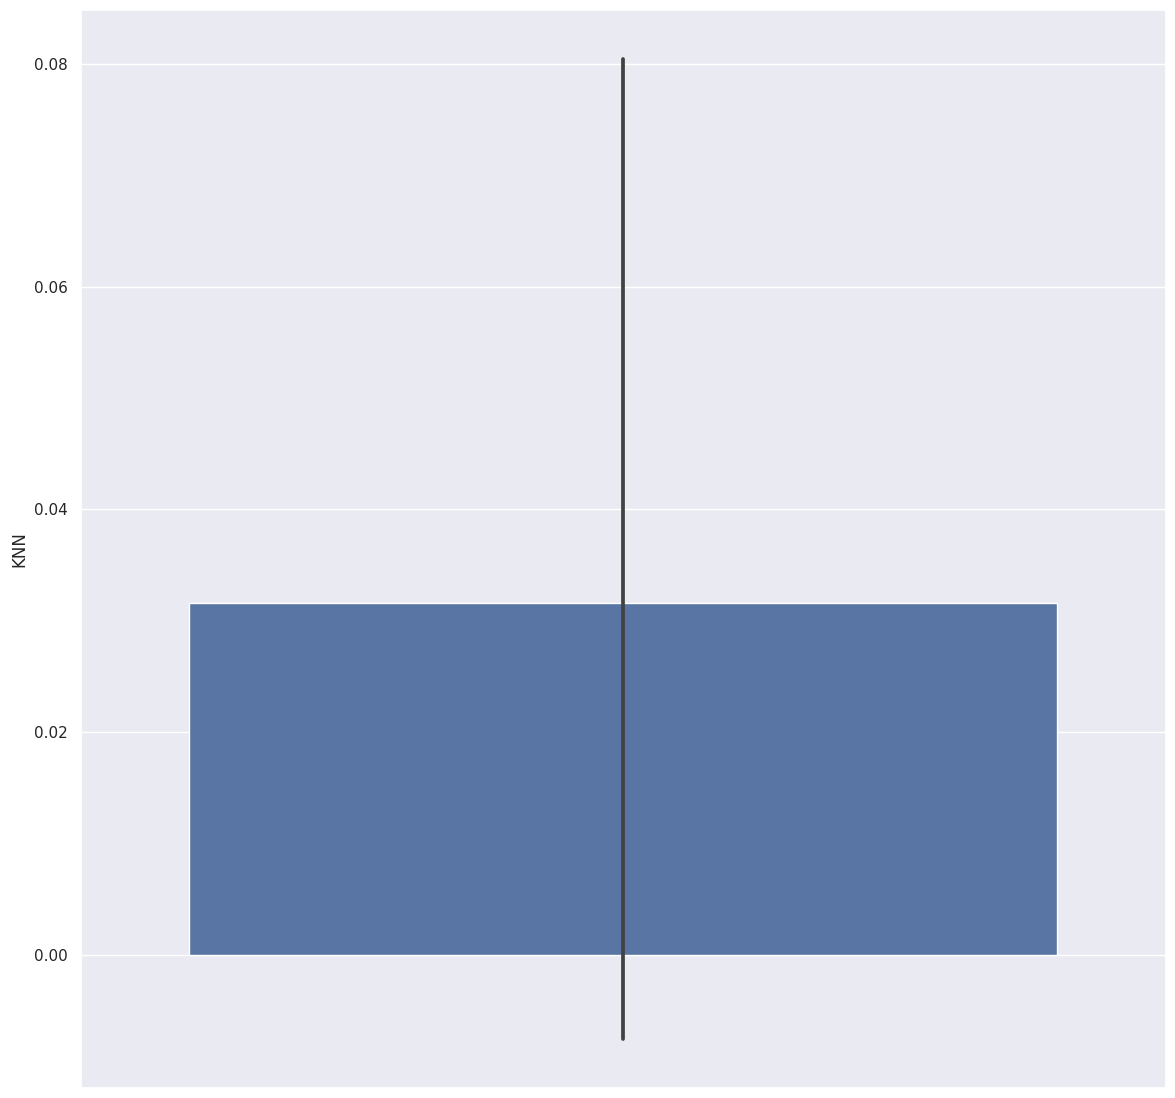

In [65]:
sns.barplot(data = margins_df, y = 'KNN')

<AxesSubplot: ylabel='LDA'>

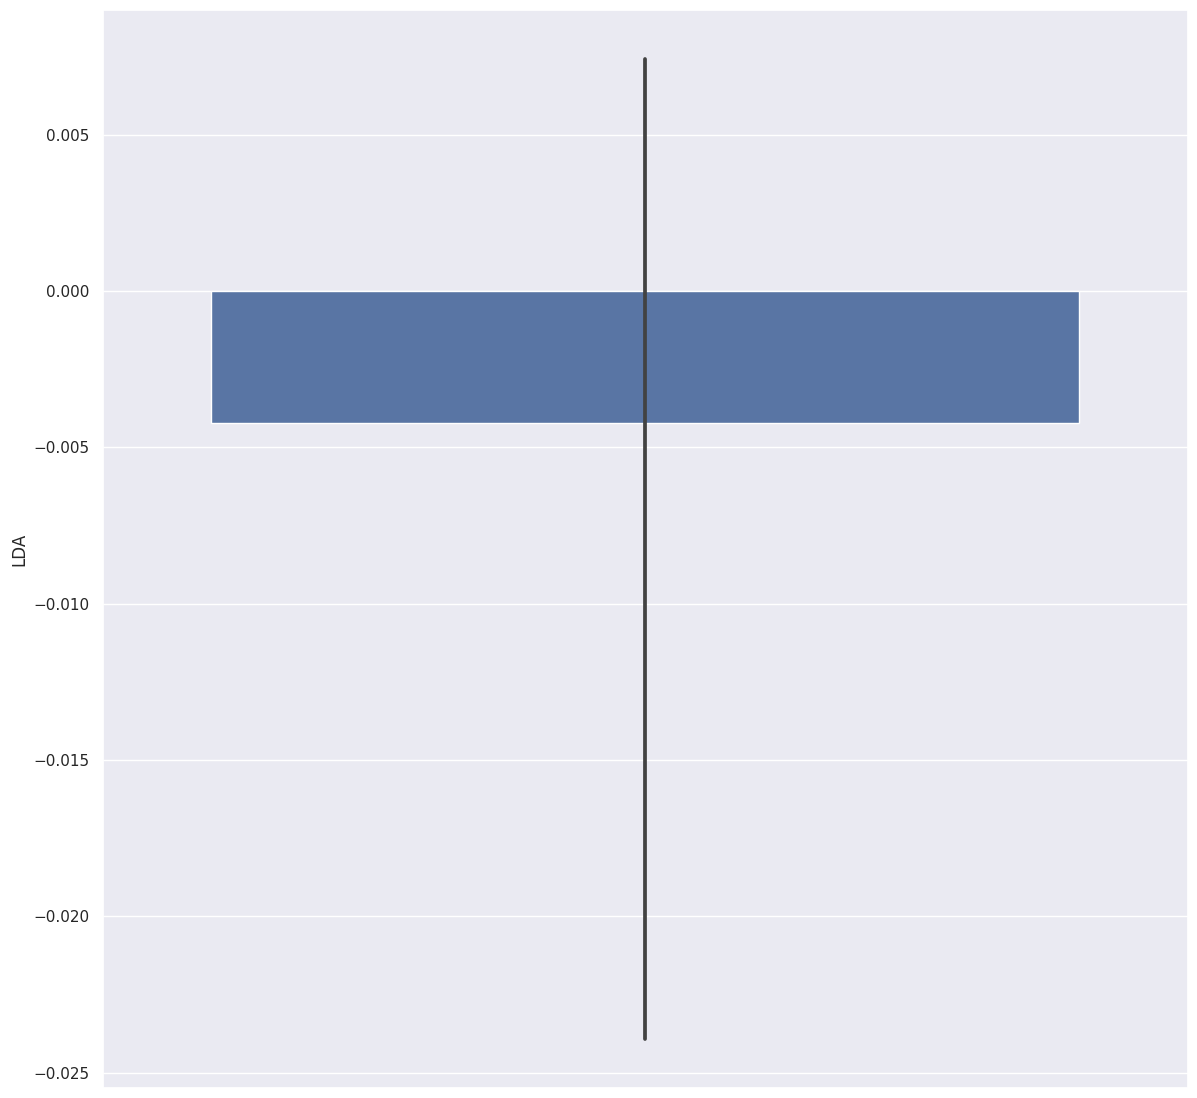

In [66]:
sns.barplot(data = margins_df, y = 'LDA')

In [67]:
margins_df

,LR,LDA,KNN
Pclass,0.0,0.009652,-0.006439
Sex,0.0,-0.070735,0.011135
SibSp,0.0,0.012826,0.004671
Parch,0.0,0.003187,-0.025716
Fare,0.0,0.003265,0.126632
Embarked,0.0,0.003226,0.015897
Deck,0.0,0.003213,-0.020955
KNN_pridect_Age,0.0,0.001613,0.147600
